#### Name: Akshat Bhat

#### UID: 2018130003

#### Roll No. 5

#### BE COMPS

## Exp 6] Time Series Analysis


### Loading Dataset

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive #mounting google drive which contains the dataset 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/DS

/content/drive/MyDrive/DS


In [ ]:
%pwd # checking the present directory which contains the dataset

'/content/drive/MyDrive/DS'

The data is taken from https://data.gov.in/. It has the number of deaths and injuries caused in road accidents from 2014-2017. The data is for all states/union territories in India. As an added measure there are two files which have the weather details and the road condition details and the no. of accidents for each specific case.

In [ ]:
killed_df = pd.read_csv('Road_Accidents_2017-Annuxure_Tables_3.csv', encoding='cp1252', delimiter=',', quotechar='"') # reading the csv file 
injured_df = pd.read_csv('Road_Accidents_2017-Annuxure_Tables_4.csv', encoding='cp1252', delimiter=',', quotechar='"') # reading the csv file 
weather_df = pd.read_csv('Acc_Classified_according_to_Type_of_Weather_Condition_2014_and_2016.csv', encoding='cp1252', delimiter=',', quotechar='"') # reading the csv file
road_df =  pd.read_csv('Acc_clf_acco_to_Road_Cond_2014_and_2016.csv', encoding='cp1252', delimiter=',', quotechar='"') # reading the csv file

### Data Preprocessing

In [ ]:
killed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 19 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   States/UTs                                                                      37 non-null     object 
 1   State/UT-wise Total Number of Persons Killed in Road Accidents during - 2014    37 non-null     int64  
 2   State/UT-wise Total Number of Persons Killed in Road Accidents during - 2015    37 non-null     int64  
 3   State/UT-wise Total Number of Persons Killed in Road Accidents during - 2016    37 non-null     int64  
 4   State/UT-wise Total Number of Persons Killed in Road Accidents during - 2017    37 non-null     int64  
 5   Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2014  37 non-null     float64
 6   Share of States/UTs 

Since we just want actual number of persons killed State/UT wise we can discard other columns as well as rename required columns as per years. 

In [ ]:
killed_df = killed_df.drop(columns = ['Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2014',
                                      'Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2015' ,
                                      'Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2016',
                                      'Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2017',
                                      'Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2014',
                                     'Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2015',
                                      'Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2016',
                                      'Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2017',
                                      'Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2014',
                                      'Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2015',
                                      'Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2016',
                                      'Total Number of Persons Killed in Road Accidents per 10,000 Km of Roads - 2014',
                                      'Total Number of Persons Killed in Road Accidents per 10,000 Km of Roads - 2015',
                                      'Total Number of Persons Killed in Road Accidents per 10,000 Km of Roads - 2016',
                                      'Total Number of Persons Killed in Road Accidents Per Lakh Population - 2014',
                                      'Total Number of Persons Killed in Road Accidents Per Lakh Population - 2015',
                                      'Total Number of Persons Killed in Road Accidents Per Lakh Population - 2016',
                                      'Total Number of Persons Killed in Road Accidents Per Lakh Population - 2017'
                                      ])

In [ ]:
killed_df = killed_df.rename(columns = {'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2014':2014,'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2015':2015,'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2016':2016,'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2017':2017})

In [ ]:
killed_df

,States/UTs,2014,2015,2016,2017
0,Andhra Pradesh,7908,8297,8541,8060
1,Arunachal Pradesh,119,127,149,110
2,Assam,2522,2397,2572,2783
3,Bihar,4913,5421,4901,5554
4,Chhattisgarh,4022,4082,3908,4136
5,Goa,290,311,336,328
6,Gujarat,7955,8119,8136,7289
7,Haryana,4483,4879,5024,5120
8,Himachal Pradesh,1199,1096,1271,1203
9,Jammu & Kashmir,992,917,958,926


Instead of focusing on each state for easy understanding purposes lets divide states as per zones 

In [ ]:
north_india = ['Jammu & Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh', 'Jammu and Kashmir', 'Delhi']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal', 'Orissa']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra','Goa']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry', 'Andaman & Nicobar Islands', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Lakshadweep', 'A & N Islands', 'D & N Haveli']

In [ ]:
def get_zonal_names(row):
    if row['States/UTs'].strip() in north_india:
        val = 'North Zone'
    elif row['States/UTs'].strip()  in south_india:
        val = 'South Zone'
    elif row['States/UTs'].strip()  in east_india:
        val = 'East Zone'
    elif row['States/UTs'].strip()  in west_india:
        val = 'West Zone'
    elif row['States/UTs'].strip()  in central_india:
        val = 'Central Zone'
    elif row['States/UTs'].strip()  in north_east_india:
        val = 'NE Zone'
    elif row['States/UTs'].strip()  in ut_india:
              val = 'Union Terr'
    else:
        val = 'No Value'
    return val


In [ ]:
killed_df.drop(killed_df[killed_df['States/UTs'] == 'Total'].index, inplace=True)
killed_df['Zones'] = killed_df.apply(get_zonal_names, axis=1)

In [ ]:
killed_df

,States/UTs,2014,2015,2016,2017,Zones
0,Andhra Pradesh,7908,8297,8541,8060,South Zone
1,Arunachal Pradesh,119,127,149,110,NE Zone
2,Assam,2522,2397,2572,2783,NE Zone
3,Bihar,4913,5421,4901,5554,East Zone
4,Chhattisgarh,4022,4082,3908,4136,Central Zone
5,Goa,290,311,336,328,West Zone
6,Gujarat,7955,8119,8136,7289,West Zone
7,Haryana,4483,4879,5024,5120,North Zone
8,Himachal Pradesh,1199,1096,1271,1203,North Zone
9,Jammu & Kashmir,992,917,958,926,North Zone


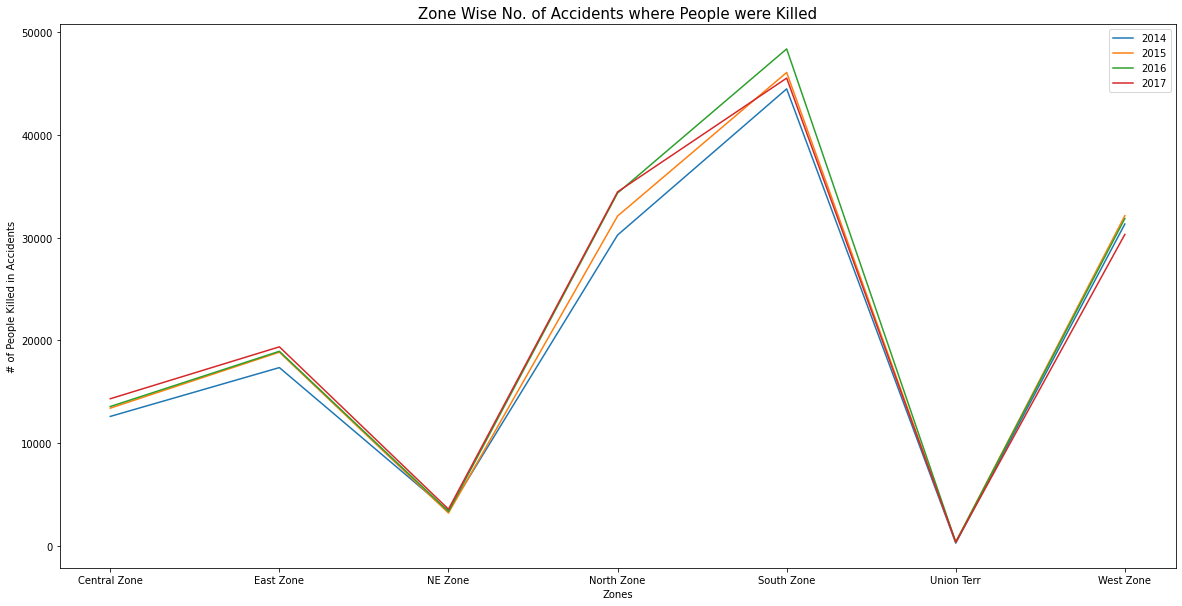

In [ ]:
df = pd.pivot_table(killed_df, index=['Zones'],values=[2014, 2015, 2016, 2017],aggfunc=np.sum).reset_index()
df
years = [2014,2015,2016,2017]
fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,year in enumerate(years):
    sns.lineplot(x=df['Zones'],y=df[year], label=years[i])
    plt.ylabel('# of People Killed in Accidents')
    plt.title('Zone Wise No. of Accidents where People were Killed', fontsize=15)

**Observation 1: For all years, states in south zones account for most fatal accidents, followed by North,West,East,Central,North East and Union Terr</font>**

To get insight of factors causing this trend lets dive into weather and road conditions dataset which contributed to fatal accidents 

In [ ]:
weather_df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 65 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   S. No.                                                          37 non-null     object 
 1   State/ UT                                                       37 non-null     object 
 2   Fine - Total Acc. - 2014                                        36 non-null     float64
 3   Fine - Persons Killed - 2014                                    37 non-null     int64  
 4   Fine - Persons Injured - 2014                                   36 non-null     float64
 5   Mist/fog - Total Acc. - 2014                                    36 non-null     float64
 6   Mist/fog - Persons Killed - 2014                                37 non-null     int64  
 7   Mist/fog - Persons Injured - 2014                      

In [ ]:
killed_weather_df = weather_df[['State/ UT',
                                'Fine - Persons Killed - 2014',
                                'Mist/fog - Persons Killed - 2014',
                                'Cloudy - Persons Killed - 2014',
                                'Heavy rain - Persons Killed - 2014',
                                'Hail/sleet - Persons Killed - 2014',
                                'snow - Persons Killed - 2014',
                                'Dust storm - Persons Killed - 2014',
                                'Other extraordinary weather condition - Persons Killed - 2014',
                                'Fine/Clear - Persons Killed - 2016',
                                'Mist/ Foggy - Persons Killed - 2016',
                                'Cloudy - Persons Killed - 2016',
                                'Rainy - Persons Killed - 2016',
                                'Snowfall - Persons Killed - 2016',
                                'Hail/Sleet - Persons Killed - 2016',
                                'Dust Storm - Persons Killed - 2016',
                                'Others - Persons Killed - 2016']]

For sake of simplicity lets keep 8 weather conditions fixed for both years: 
1. Fine/Clear 
2. Mist/Fog
3. Cloudy 
4. Rainy 
5. Snowfall 
6. Hail/Sleet 
7. Dust Storm 
8. Others

In [ ]:
killed_weather_df = killed_weather_df.rename(columns = {'Fine - Persons Killed - 2014':'Fine-2014',
                                                       'Fine/Clear - Persons Killed - 2016':'Fine-2016',
                                                        'Mist/fog - Persons Killed - 2014':'Mist/Fog-2014',
                                                        'Mist/ Foggy - Persons Killed - 2016': 'Mist/Fog-2016',
                                                        'Cloudy - Persons Killed - 2014':'Cloudy-2014',
                                                        'Cloudy - Persons Killed - 2016':'Cloudy-2016',
                                                        'Heavy rain - Persons Killed - 2014':'Rainy-2014',
                                                        'Rainy - Persons Killed - 2016':'Rainy-2016',
                                                        'Hail/sleet - Persons Killed - 2014':'Hail/sleet-2014',
                                                        'Hail/Sleet - Persons Killed - 2016':'Hail/sleet-2016',
                                                        'Dust storm - Persons Killed - 2014':'Dust Storm-2014',
                                                        'Dust Storm - Persons Killed - 2016':'Dust Storm-2016',
                                                        'snow - Persons Killed - 2014':'Snowfall-2014',
                                                        'Snowfall - Persons Killed - 2016':'Snowfall-2016',
                                                        'Other extraordinary weather condition - Persons Killed - 2014':'Others-2014',
                                                        'Others - Persons Killed - 2016':'Others-2016'})

In [ ]:
killed_weather_df = killed_weather_df.rename(columns = {'State/ UT':'States/UTs'})

In [ ]:
killed_weather_df

,States/UTs,Fine-2014,Mist/Fog-2014,Cloudy-2014,Rainy-2014,Hail/sleet-2014,Snowfall-2014,Dust Storm-2014,Others-2014,Fine-2016,Mist/Fog-2016,Cloudy-2016,Rainy-2016,Snowfall-2016,Hail/sleet-2016,Dust Storm-2016,Others-2016,Zones
0,Andhra Pradesh,4586,219,188.0,231,6.0,124.0,41.0,1270.0,6311,311,321,433,0,45,34,1086,South Zone
1,Arunachal Pradesh,30,10,8.0,8,0.0,2.0,9.0,3.0,59,19,23,19,0,7,0,22,NE Zone
2,Assam,1318,150,100.0,64,0.0,3.0,12.0,658.0,1337,168,120,162,0,8,14,763,NE Zone
3,Bihar,1218,881,203.0,328,44.0,17.0,146.0,539.0,1554,1013,311,530,0,0,318,1175,East Zone
4,Chhattisgarh,1354,149,216.0,194,25.0,43.0,72.0,790.0,2078,85,148,307,0,0,28,1262,Central Zone
5,Goa,257,0,6.0,8,0.0,0.0,0.0,0.0,298,0,0,38,0,0,0,0,West Zone
6,Gujarat,4876,176,387.0,276,17.0,42.0,158.0,535.0,5538,371,374,319,0,23,115,1396,West Zone
7,Haryana,2043,263,160.0,143,135.0,0.0,176.0,665.0,2010,1245,280,820,0,75,150,444,North Zone
8,Himachal Pradesh,736,45,96.0,27,0.0,15.0,0.0,116.0,1116,19,66,69,1,0,0,0,North Zone
9,Jammu & Kashmir,816,7,26.0,32,0.0,27.0,0.0,63.0,729,0,7,13,1,0,0,208,North Zone


In [ ]:
killed_weather_df.drop(killed_weather_df[killed_weather_df['States/UTs'] == 'Total'].index, inplace=True)
killed_weather_df['Zones'] = killed_weather_df.apply(get_zonal_names, axis=1)

In [ ]:
X = ['Fine','Rainy','Snowfall']
#'Mist/Fog','Cloudy','Hail/Sleet','Dust Storm','Others

Y = ['Fine-2014','Fine-2016','Rainy-2014','Rainy-2016','Snowfall-2014','Snowfall-2016']

# df = pd.pivot_table(weather_killed_df, index=['Zones'],values=[2014, 2015, 2016, 2017],aggfunc=np.sum).reset_index()
# df
years = [2014,2016]
fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,year in enumerate(years):
    sns.lineplot(X,y=killed_weather_df['Fine-2014','Fine-2016','Rainy-2014','Rainy-2016','Snowfall-2014','Snowfall-2016'], label=years[i])
    plt.ylabel('# of People Killed in Accidents')
    plt.title('Weather Wise No. of Accidents where People were Killed', fontsize=15)